In [108]:
#smart portfolio 
#Aryan Bhardwaj For 06 Aug 2024

In [2]:
#fetch the data
ticker_list = ['PG', 'JNJ', 'KO', 'MCD', 'MMM', 'IBM', 'PEP', 'T', 'VZ', 'WMT']
years = 5

In [3]:
#Import necessary libraries
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import json
import matplotlib.pyplot as plt
import jinja2

#Part 1: Fetching Stock Data

def fetch_stock_data(ticker_list, years=5):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=years * 365)
    
    close_data_df = pd.DataFrame()
    volume_data_df = pd.DataFrame()
    dividends_data_df = pd.DataFrame()
    
    for ticker in ticker_list:
        stock = yf.Ticker(ticker)
        hist_data = stock.history(period='1d', start=start_date, end=end_date)
        
        # Close Data
        close_data = hist_data['Close'].rename(ticker)
        close_data_df = pd.merge(close_data_df, pd.DataFrame(close_data), left_index=True, right_index=True, how='outer')
        
        # Volume Data
        volume_data = hist_data['Volume'].rename(ticker)
        volume_data_df = pd.merge(volume_data_df, pd.DataFrame(volume_data), left_index=True, right_index=True, how='outer')
        
        # Dividends Data
        dividends_data = hist_data['Dividends'].rename(ticker)
        dividends_data_df = pd.merge(dividends_data_df, pd.DataFrame(dividends_data), left_index=True, right_index=True, how='outer')
        
        
    return close_data_df, volume_data_df, dividends_data_df

In [4]:
close, volume, dividends = fetch_stock_data(ticker_list, years)
close.tail()

,PG,JNJ,KO,MCD,MMM,IBM,PEP,T,VZ,WMT
Date,,,,,,,,,,
2024-08-14 00:00:00-04:00,168.800003,158.479996,68.580002,271.149994,126.169998,192.320007,173.710007,19.629999,40.900002,68.464851
2024-08-15 00:00:00-04:00,167.919998,159.089996,68.650002,274.869995,127.160004,193.949997,172.520004,19.090000,40.040001,72.972000
2024-08-16 00:00:00-04:00,167.889999,159.389999,69.180000,278.489990,127.050003,193.779999,172.619995,19.340000,40.610001,73.449997
2024-08-19 00:00:00-04:00,168.419998,159.630005,68.980003,287.549988,127.080002,194.729996,173.820007,19.490000,40.740002,73.720001
2024-08-20 00:00:00-04:00,170.410004,160.160004,69.379997,285.630005,127.699997,196.029999,175.850006,19.490000,40.849998,74.540001


close, volume, dividends = fetch_stock_data(ticker_list, years)
close.tail()

In [5]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2019-08-23 00:00:00-04:00 to 2024-08-20 00:00:00-04:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      1256 non-null   float64
 1   JNJ     1256 non-null   float64
 2   KO      1256 non-null   float64
 3   MCD     1256 non-null   float64
 4   MMM     1256 non-null   float64
 5   IBM     1256 non-null   float64
 6   PEP     1256 non-null   float64
 7   T       1256 non-null   float64
 8   VZ      1256 non-null   float64
 9   WMT     1256 non-null   float64
dtypes: float64(10)
memory usage: 107.9 KB


In [6]:
close.describe().T

,count,mean,std,min,25%,50%,75%,max
PG,1256.0,133.722522,17.461713,87.379967,122.721323,134.322746,147.062191,170.869995
JNJ,1256.0,148.214473,14.840735,98.888351,136.391911,152.053314,158.638432,174.296158
KO,1256.0,53.060960,6.997277,32.919643,47.236729,54.351608,58.827477,69.379997
MCD,1256.0,231.287817,38.103853,124.335922,196.915112,235.381790,262.208618,296.902161
MMM,1256.0,107.516657,20.566739,68.833748,88.955429,108.860550,123.100925,149.875839
IBM,1256.0,122.512427,25.577262,73.121849,103.490440,117.556213,130.888443,196.029999
PEP,1256.0,148.867961,22.079428,92.089523,125.608444,155.651146,167.018890,188.991531
T,1256.0,16.756350,1.665189,12.587817,15.755061,16.689508,17.535526,20.781944
VZ,1256.0,41.432677,5.402332,29.202827,36.570016,43.565475,45.978708,49.670685
WMT,1256.0,46.585904,7.750716,32.249084,41.675178,45.492414,49.973407,74.540001


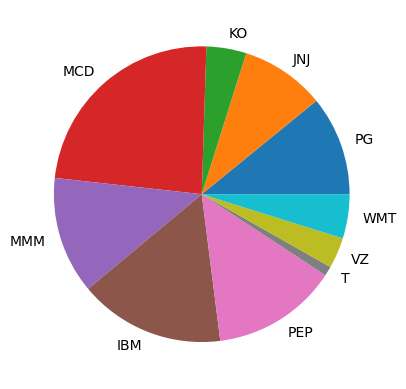

In [7]:
# comparing the stock volatility (STD)
closel=close.describe().T
mylabels = ticker_list
y=closel['std']
plt.pie(y, labels = mylabels)
plt.show()

In [8]:
# Calculating and plotting the Market Volume Weights
#Part 2: Creating Weights for Benchmarks

#A. Market Volume Weights

def generateMarketVolumeWeights(close, volume):
    dollar_volume = close * volume
    market_volume_weights = dollar_volume.div(dollar_volume.sum(axis=1), axis=0)
    
    # Shift the DataFrame by one row
    # As the return for the month depends on the allocation defined in the previous month

    shifted_market_volume_weights = market_volume_weights.shift(1)
    return shifted_market_volume_weights

marketVolumeWeights = generateMarketVolumeWeights(close, volume)
marketVolumeWeights.tail()

,PG,JNJ,KO,MCD,MMM,IBM,PEP,T,VZ,WMT
Date,,,,,,,,,,
2024-08-14 00:00:00-04:00,0.080142,0.195461,0.085929,0.089431,0.048687,0.052881,0.085307,0.053350,0.079541,0.229270
2024-08-15 00:00:00-04:00,0.129924,0.114511,0.138099,0.085442,0.057679,0.051223,0.086810,0.052856,0.062834,0.220623
2024-08-16 00:00:00-04:00,0.144877,0.104669,0.070423,0.061095,0.038837,0.043582,0.070132,0.073938,0.063656,0.328791
2024-08-19 00:00:00-04:00,0.121700,0.102675,0.112470,0.117598,0.062247,0.062115,0.102365,0.061448,0.069812,0.187569
2024-08-20 00:00:00-04:00,0.097628,0.104991,0.101309,0.226039,0.042538,0.068606,0.091329,0.059630,0.057144,0.150785


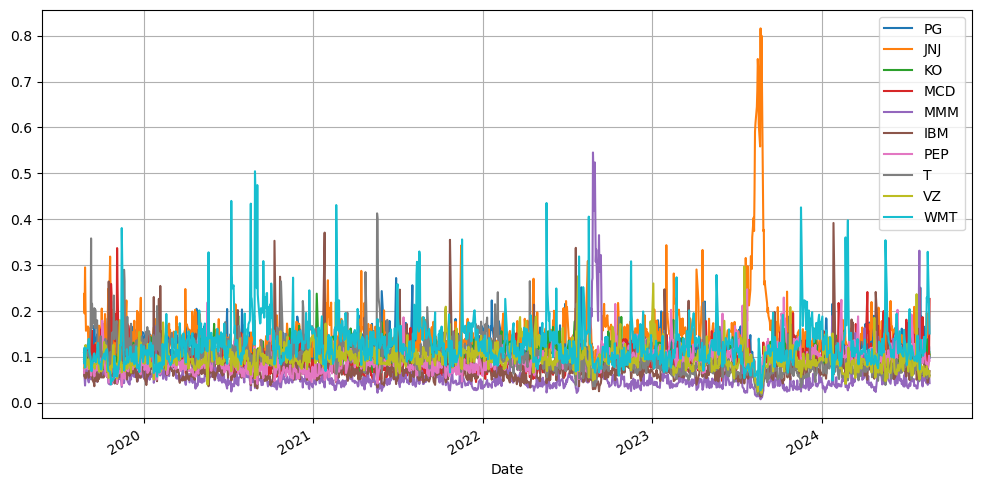

In [9]:
marketVolumeWeights.plot(figsize=(12,6))
plt.grid()

Text(0.5, 1.0, 'Portfolio 2: Dividend Yield Weights')

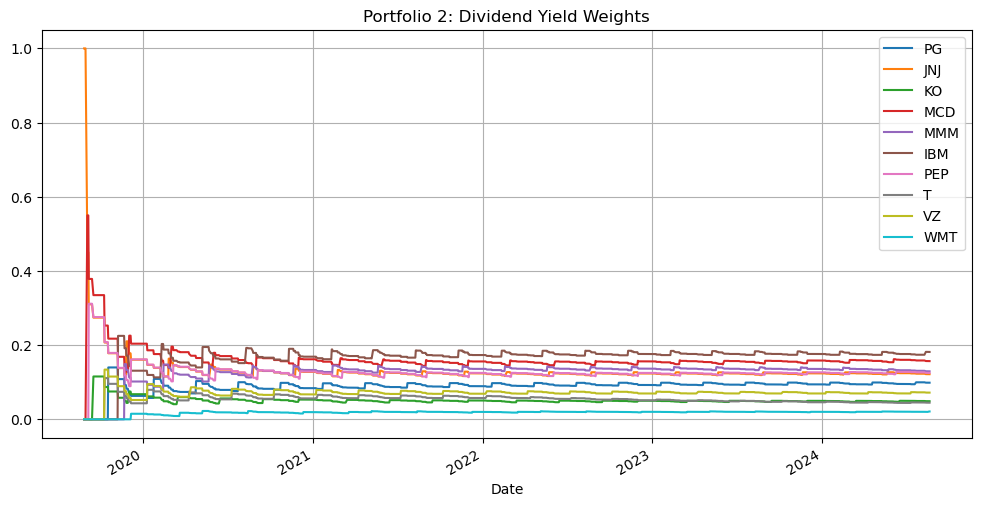

In [10]:
# Calculating and plotting the Dividend Yield Weights
#B. Dividend Yield Weights

def calculateDividendYieldWeights(dividends):
    dividend_cumsum = dividends.cumsum()
    dividend_yield_weights = dividend_cumsum.div(dividend_cumsum.sum(axis=1), axis=0)
    
     
    # Shift the DataFrame by one row
    # As the return for the month depends on the allocation defined in the previous month
    shifted_dividend_yield_weights = dividend_yield_weights.shift(1)
    return shifted_dividend_yield_weights

dividendYieldWeights = calculateDividendYieldWeights(dividends)
dividendYieldWeights.plot(figsize=(12,6))
plt.grid()
plt.title('Portfolio 2: Dividend Yield Weights')

In [11]:
# Generating and plotting the daily returns of Portfolio 2
#C. Returns

def generate_returns(prices):
#     returns_prices = None
    returns_prices = (prices / prices.shift(1)) - 1
    return returns_prices

returns = generate_returns(close)
returns.tail()

,PG,JNJ,KO,MCD,MMM,IBM,PEP,T,VZ,WMT
Date,,,,,,,,,,
2024-08-14 00:00:00-04:00,0.009026,0.000568,0.001753,0.003108,0.006542,0.006964,0.007774,0.005635,0.002943,0.007779
2024-08-15 00:00:00-04:00,-0.005213,0.003849,0.001021,0.013719,0.007847,0.008475,-0.006851,-0.027509,-0.021027,0.065832
2024-08-16 00:00:00-04:00,-0.000179,0.001886,0.007720,0.013170,-0.000865,-0.000877,0.000580,0.013096,0.014236,0.006550
2024-08-19 00:00:00-04:00,0.003157,0.001506,-0.002891,0.032533,0.000236,0.004902,0.006952,0.007756,0.003201,0.003676
2024-08-20 00:00:00-04:00,0.011816,0.003320,0.005799,-0.006677,0.004879,0.006676,0.011679,0.000000,0.002700,0.011123


Text(0.5, 1.0, 'Daily Returns')

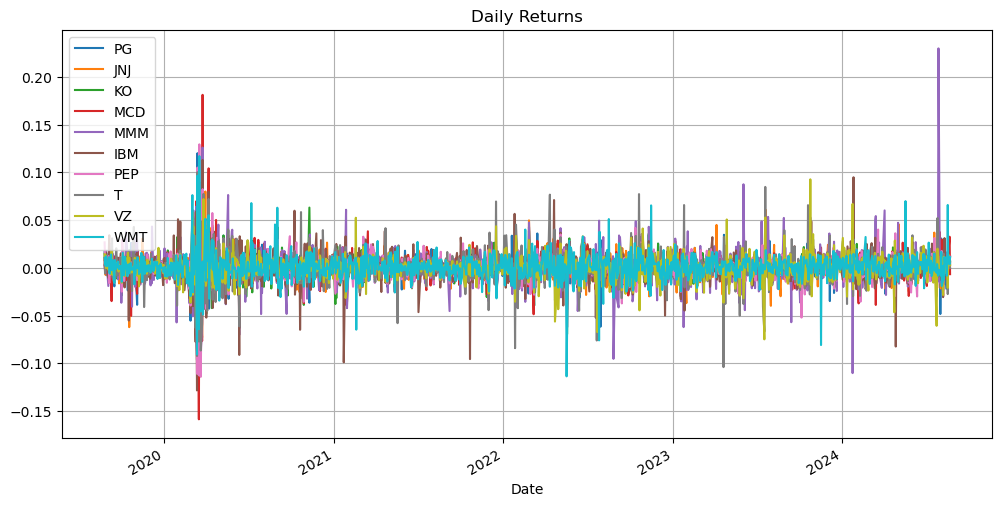

In [12]:
returns.plot(figsize=(12,6))
plt.grid()
plt.title('Daily Returns')

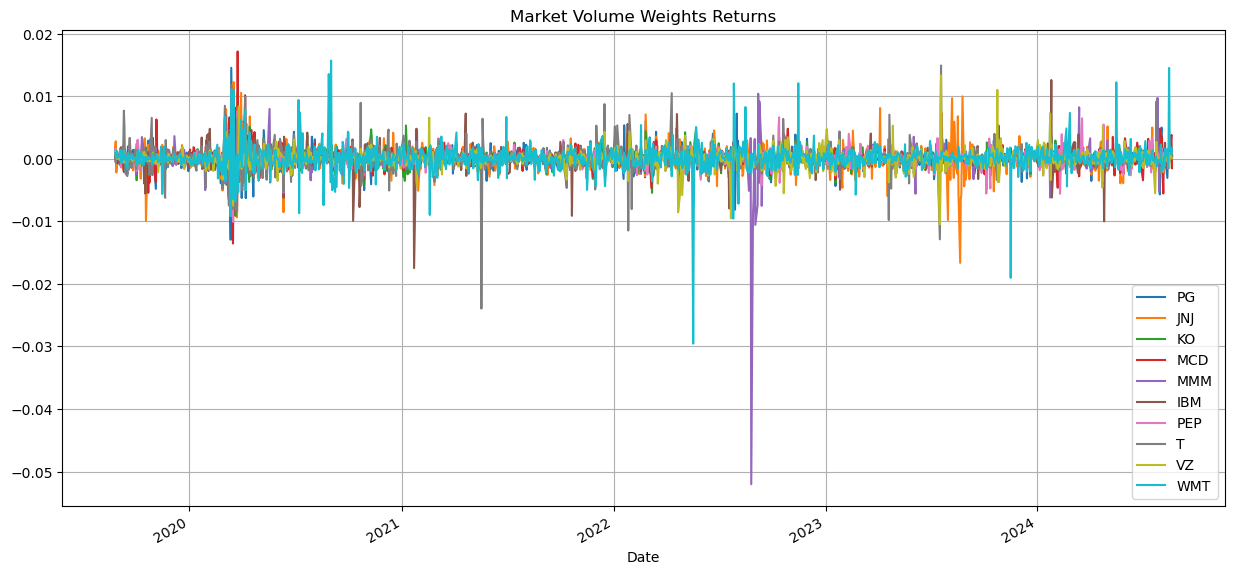

In [13]:
# Generating and plotting the Market Volume Weights Returns
#D. Weighted Returns

def generate_weighted_returns(returns, weights):
    return returns * weights

marketVolumeWeightsReturn = generate_weighted_returns(returns, marketVolumeWeights)
dividendYieldWeightsReturns = generate_weighted_returns(returns, dividendYieldWeights)

marketVolumeWeightsReturn.plot(figsize=(15,7))
plt.grid()
plt.title('Market Volume Weights Returns')
plt.legend(loc="lower right")

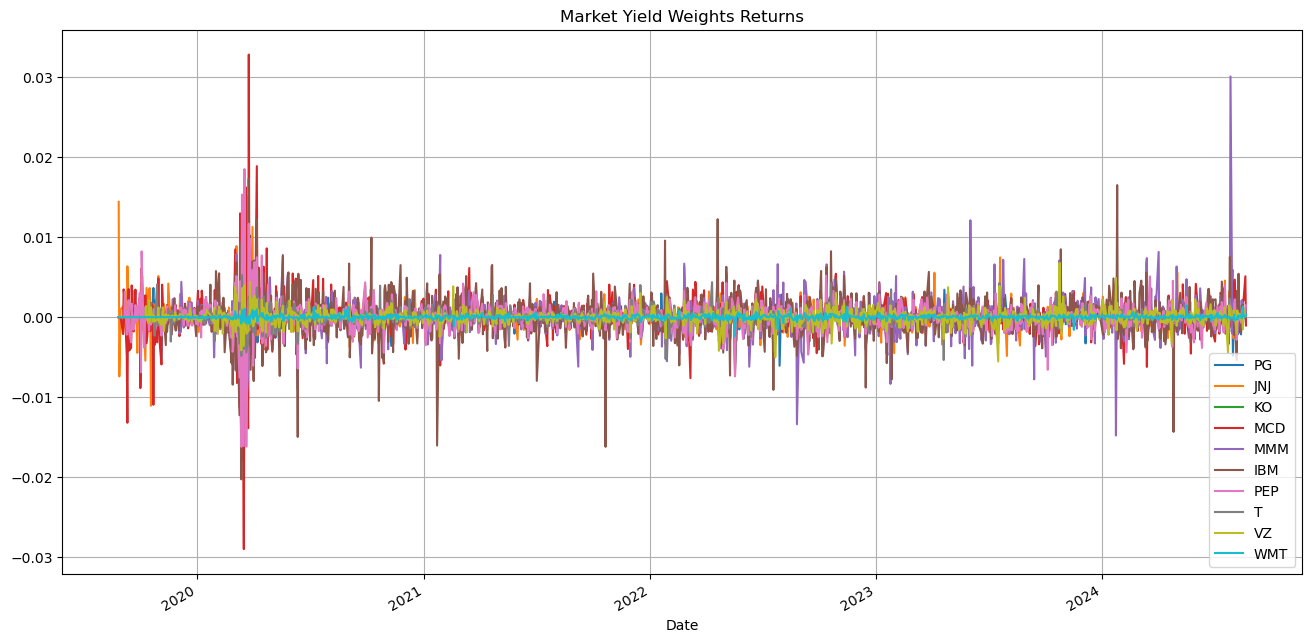

In [14]:
# Plotting the Market Yield Weights Returns
dividendYieldWeightsReturns.plot(figsize=(16,8))
plt.grid()
plt.title('Market Yield Weights Returns')
plt.legend(loc="lower right")

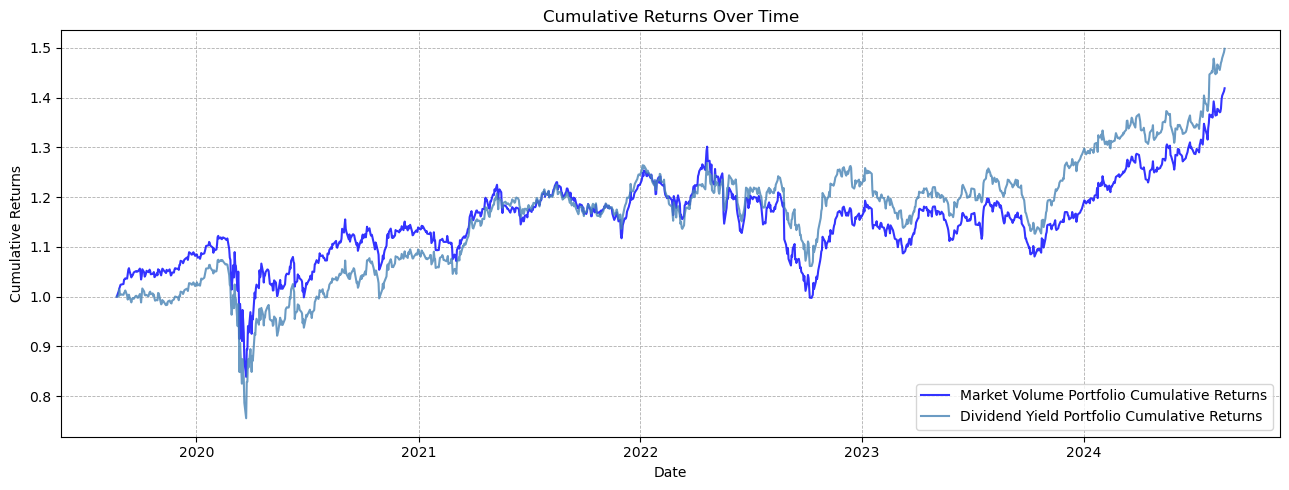

In [15]:
# Calculating and plotting the Cumulative Returns
#E. Cumulative Returns 

def calculate_cumulative_returns(returns):
    return (1 + returns.sum(axis = 1)).cumprod()
marketVolumeWeightsCumulativeReturn = calculate_cumulative_returns(marketVolumeWeightsReturn)
dividendYieldWeightsCumulativeReturn = calculate_cumulative_returns(dividendYieldWeightsReturns)

plt.figure(figsize=(13, 5))

plt.plot(marketVolumeWeightsCumulativeReturn, label='Market Volume Portfolio Cumulative Returns', alpha=0.8, color='blue')
plt.plot(dividendYieldWeightsCumulativeReturn, label='Dividend Yield Portfolio Cumulative Returns', alpha=0.8, color='steelblue')

plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='lower right')
plt.grid(True, which='both', linestyle='--', linewidth=0.6)
plt.tight_layout()
plt.show()

In [16]:
# Implementing Part 3: Portfolio Optimization (Smart Beta Strategy)
#A. Covariance matrix

def get_covariance_returns(returns):
    return np.cov(returns.T.fillna(0))

covariance_returns = get_covariance_returns(returns)
covariance_returns = pd.DataFrame(covariance_returns, returns.columns, returns.columns)
covariance_returns

,PG,JNJ,KO,MCD,MMM,IBM,PEP,T,VZ,WMT
PG,0.000175,0.000099,0.000113,0.000095,0.000091,0.000100,0.000137,0.000098,0.000083,0.000095
JNJ,0.000099,0.000158,0.000093,0.000083,0.000099,0.000100,0.000104,0.000089,0.000070,0.000071
KO,0.000113,0.000093,0.000171,0.000114,0.000115,0.000120,0.000138,0.000116,0.000084,0.000073
MCD,0.000095,0.000083,0.000114,0.000219,0.000115,0.000119,0.000117,0.000099,0.000065,0.000064
MMM,0.000091,0.000099,0.000115,0.000115,0.000348,0.000157,0.000108,0.000122,0.000080,0.000067
IBM,0.000100,0.000100,0.000120,0.000119,0.000157,0.000277,0.000118,0.000141,0.000093,0.000070
PEP,0.000137,0.000104,0.000138,0.000117,0.000108,0.000118,0.000191,0.000109,0.000086,0.000104
T,0.000098,0.000089,0.000116,0.000099,0.000122,0.000141,0.000109,0.000277,0.000152,0.000064
VZ,0.000083,0.000070,0.000084,0.000065,0.000080,0.000093,0.000086,0.000152,0.000173,0.000059
WMT,0.000095,0.000071,0.000073,0.000064,0.000067,0.000070,0.000104,0.000064,0.000059,0.000197


In [17]:
# Applying background gradient
covariance_returns.style.background_gradient(cmap='cool')

,PG,JNJ,KO,MCD,MMM,IBM,PEP,T,VZ,WMT
PG,0.000175,0.000099,0.000113,0.000095,0.000091,0.000100,0.000137,0.000098,0.000083,0.000095
JNJ,0.000099,0.000158,0.000093,0.000083,0.000099,0.000100,0.000104,0.000089,0.000070,0.000071
KO,0.000113,0.000093,0.000171,0.000114,0.000115,0.000120,0.000138,0.000116,0.000084,0.000073
MCD,0.000095,0.000083,0.000114,0.000219,0.000115,0.000119,0.000117,0.000099,0.000065,0.000064
MMM,0.000091,0.000099,0.000115,0.000115,0.000348,0.000157,0.000108,0.000122,0.000080,0.000067
IBM,0.000100,0.000100,0.000120,0.000119,0.000157,0.000277,0.000118,0.000141,0.000093,0.000070
PEP,0.000137,0.000104,0.000138,0.000117,0.000108,0.000118,0.000191,0.000109,0.000086,0.000104
T,0.000098,0.000089,0.000116,0.000099,0.000122,0.000141,0.000109,0.000277,0.000152,0.000064
VZ,0.000083,0.000070,0.000084,0.000065,0.000080,0.000093,0.000086,0.000152,0.000173,0.000059
WMT,0.000095,0.000071,0.000073,0.000064,0.000067,0.000070,0.000104,0.000064,0.000059,0.000197


In [38]:
import cvxpy as cvx
import pandas as pd
import matplotlib.pyplot as plt

def get_optimal_weights(covariance_returns, index_weights, scale=2.0):
    x = cvx.Variable(len(index_weights))
    portfolio_var = cvx.quad_form(x, covariance_returns)
    dist_index = cvx.norm(x - index_weights, p=2)
    objective = cvx.Minimize(portfolio_var + scale * dist_index)
    constraints = [x >= 0, sum(x) == 1]
    problem = cvx.Problem(objective, constraints)
    problem.solve()
    return x.value

def get_covariance_returns(data):
    return data.cov()

def rebalance_portfolio(returns, index_weights, shift_size, chunk_size):
    all_rebalance_weights = []
    rebalance_dates = []

    for i in range(chunk_size, len(returns), shift_size):
        covariance_returns = get_covariance_returns(returns.iloc[i-chunk_size:i])
        rebalance_weights = get_optimal_weights(covariance_returns, index_weights.iloc[i-1])
        all_rebalance_weights.append(rebalance_weights)
        rebalance_dates.append(returns.index[i])

    df_rebalance_weights = pd.DataFrame(all_rebalance_weights, columns=returns.columns)
    df_rebalance_weights['Date'] = rebalance_dates
    df_rebalance_weights.set_index('Date', inplace=True)
    
    return df_rebalance_weights

# Example usage
# Assuming returns, marketVolumeWeights, and dividendYieldWeights are defined
chunk_size = 250
shift_size = 5

# Rebalance the portfolio
marketVolumeRebalanceWeights = rebalance_portfolio(returns, marketVolumeWeights, shift_size, chunk_size)
dividendYieldRebalanceWeights = rebalance_portfolio(returns, dividendYieldWeights, shift_size, chunk_size)

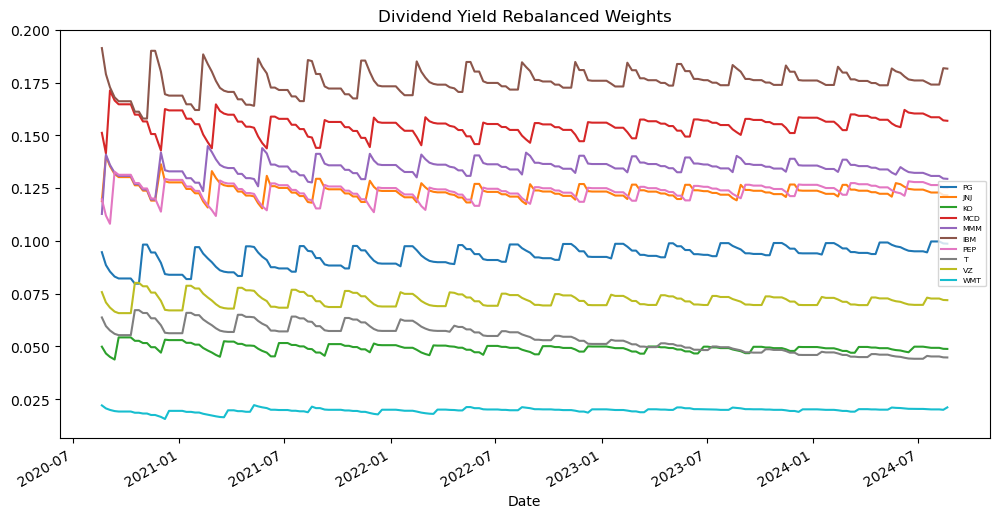

In [69]:
# Plotting the Dividend Yield Rebalance Weights
dividendYieldRebalanceWeights.plot(figsize=(12, 6))
plt.grid
plt.title('Dividend Yield Rebalanced Weights')
plt.legend(loc="center right", fontsize=5.6)
plt.show()

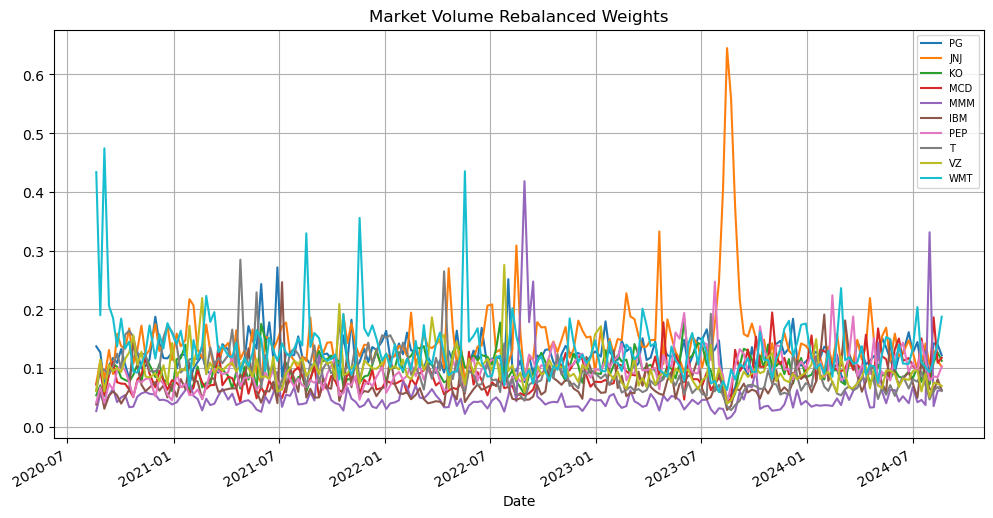

In [70]:
#Plotting the maket Volume Rebalance Weight 

marketVolumeRebalanceWeights.plot(figsize=(12,6))
plt.grid()
plt.title('Market Volume Rebalanced Weights')
plt.legend(loc="upper right", fontsize = 7.2)

In [71]:
#Calculation the portfolio cumulative Returns 

# D. Cumulative Returns Calculation

def calculate_cumulative_portfolio_returns(returns, rebalance_weights):
    # Initializing the series for portfolio returns
    portfolio_returns = pd.Series(index=returns.index)
    
    # Example usage of the function with example data
    n_col = len(rebalance_weights.columns)
    initial_weights = pd.Series([1/n_col] * n_col, index=rebalance_weights.columns)
    
    # Setting current weights to initial weights
    current_weights = initial_weights
    
    # Iterating through each date in the returns dataframe
    for date, daily_returns in returns.iterrows():
        if date != returns.index.min():
            # Check if there's a rebalance for this date and update weights if needed
            if date in rebalance_weights.index:
                current_weights = rebalance_weights.loc[date]
                
            # Calculating the daily portfolio return
            portfolio_return = (daily_returns * current_weights).sum()
            portfolio_returns[date] = portfolio_return
            
            # Adjusting current_weights based on daily returns
            current_weights *= (1 + daily_returns)
            
            # Normalizing the weights so they sum up to 1
            current_weights /= current_weights.sum()
    
    # Calculating cumulative portfolio returns
    cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()
    
    return cumulative_portfolio_returns

# Calculate cumulative returns
optimized_market_volume_weights_cumulative_return = calculate_cumulative_portfolio_returns(returns, marketVolumeRebalanceWeights)
optimized_dividend_yield_weights_cumulative_return = calculate_cumulative_portfolio_returns(returns, dividendYieldRebalanceWeights)

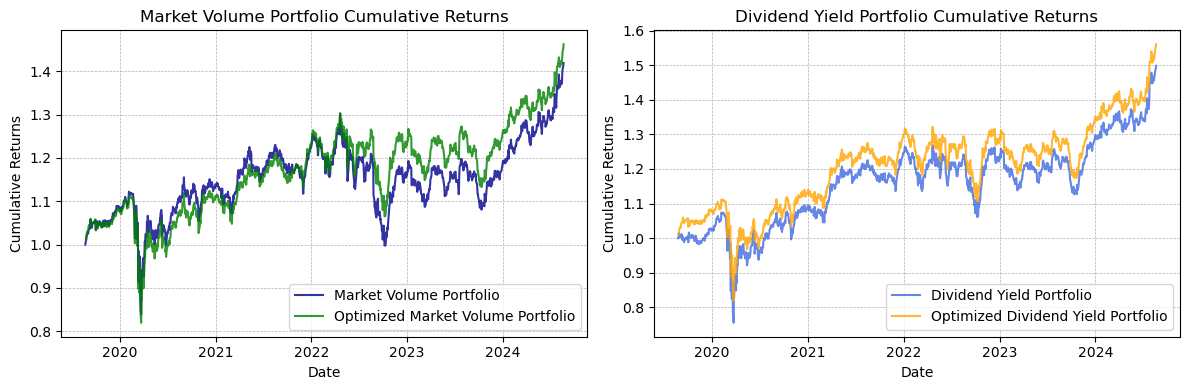

In [77]:
# Comparing Market Volume Portfolio Cumulative Returns vs Dividend Yield Portfolio Cumulative Returns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot for Market Volume Portfolio Cumulative Returns
ax1.plot(marketVolumeWeightsCumulativeReturn, label='Market Volume Portfolio', alpha=0.8, color='darkblue')
ax1.plot(optimized_market_volume_weights_cumulative_return, label='Optimized Market Volume Portfolio', alpha=0.8, color='green')
ax1.set_title('Market Volume Portfolio Cumulative Returns')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Returns')
ax1.legend(loc='lower right')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot for Dividend Yield Portfolio Cumulative Returns
ax2.plot(dividendYieldWeightsCumulativeReturn, label='Dividend Yield Portfolio', alpha=0.8, color='royalblue')
ax2.plot(optimized_dividend_yield_weights_cumulative_return, label='Optimized Dividend Yield Portfolio', alpha=0.8, color='orange')
ax2.set_title('Dividend Yield Portfolio Cumulative Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Returns')
ax2.legend(loc='lower right')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


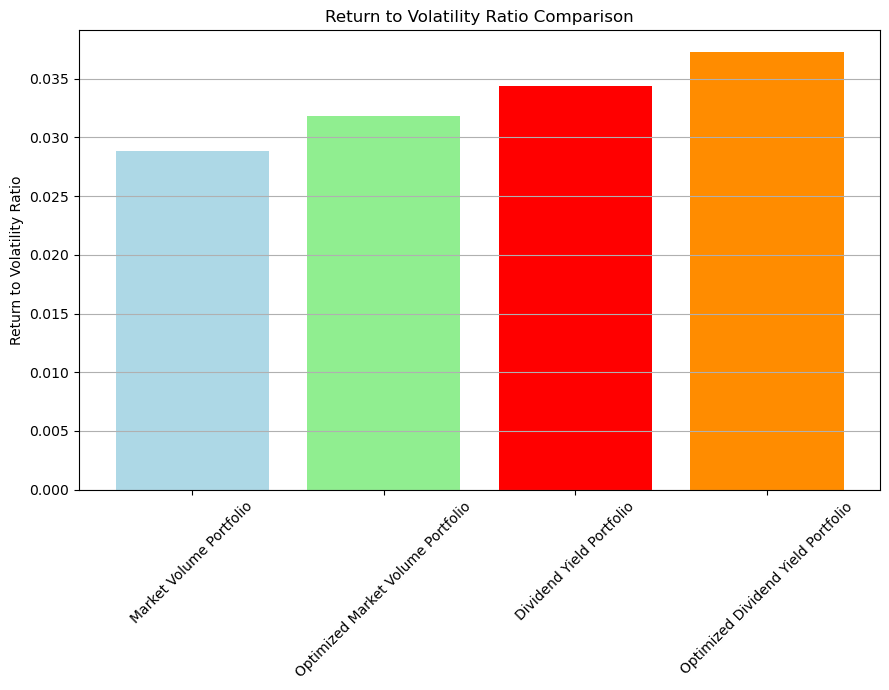

In [115]:
# Comparing the Return/Volatility Ratios before/after PO: Market Volume Portfolio vs Dividend Yield Portfolio

#E. Return to Volatility Ratio

# Function to calculate the return to volatility ratio
def return_to_volatility_ratio(portfolio_returns):
    mean_return = portfolio_returns.mean()
    std_return = portfolio_returns.std()
    ratio = mean_return / std_return
    return ratio
    

# Calculating return_to_volatility_ratio for each portfolio
ratios = {
    'Market Volume Portfolio': return_to_volatility_ratio(marketVolumeWeightsCumulativeReturn.diff().dropna()),
    'Optimized Market Volume Portfolio': return_to_volatility_ratio(optimized_market_volume_weights_cumulative_return.diff().dropna()),
    'Dividend Yield Portfolio': return_to_volatility_ratio(dividendYieldWeightsCumulativeReturn.diff().dropna()),
    'Optimized Dividend Yield Portfolio': return_to_volatility_ratio(optimized_dividend_yield_weights_cumulative_return.diff().dropna())
}

# Plotting the bar chart for Return to Volatility Ratio Comparison

plt.figure(figsize=(9, 7))
plt.bar(ratios.keys(), ratios.values(), color=['lightblue', 'lightgreen', 'red', 'darkorange'])
plt.title('Return to Volatility Ratio Comparison')
plt.ylabel('Return to Volatility Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()